<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q7_Decision_tree_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

drug.txt  sample_data


Decision Tree Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

       DrugC       1.00      1.00      1.00         2
       DrugX       1.00      1.00      1.00         1
       DrugY       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



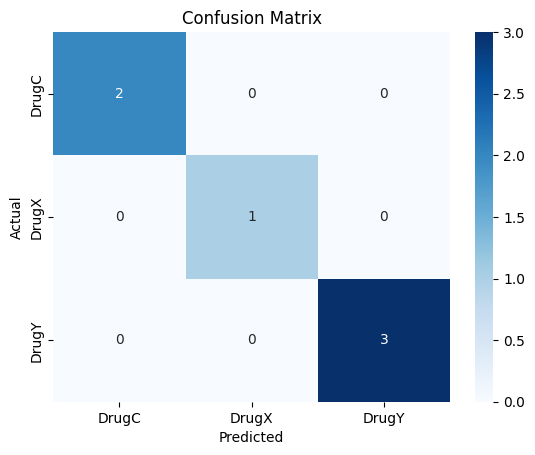

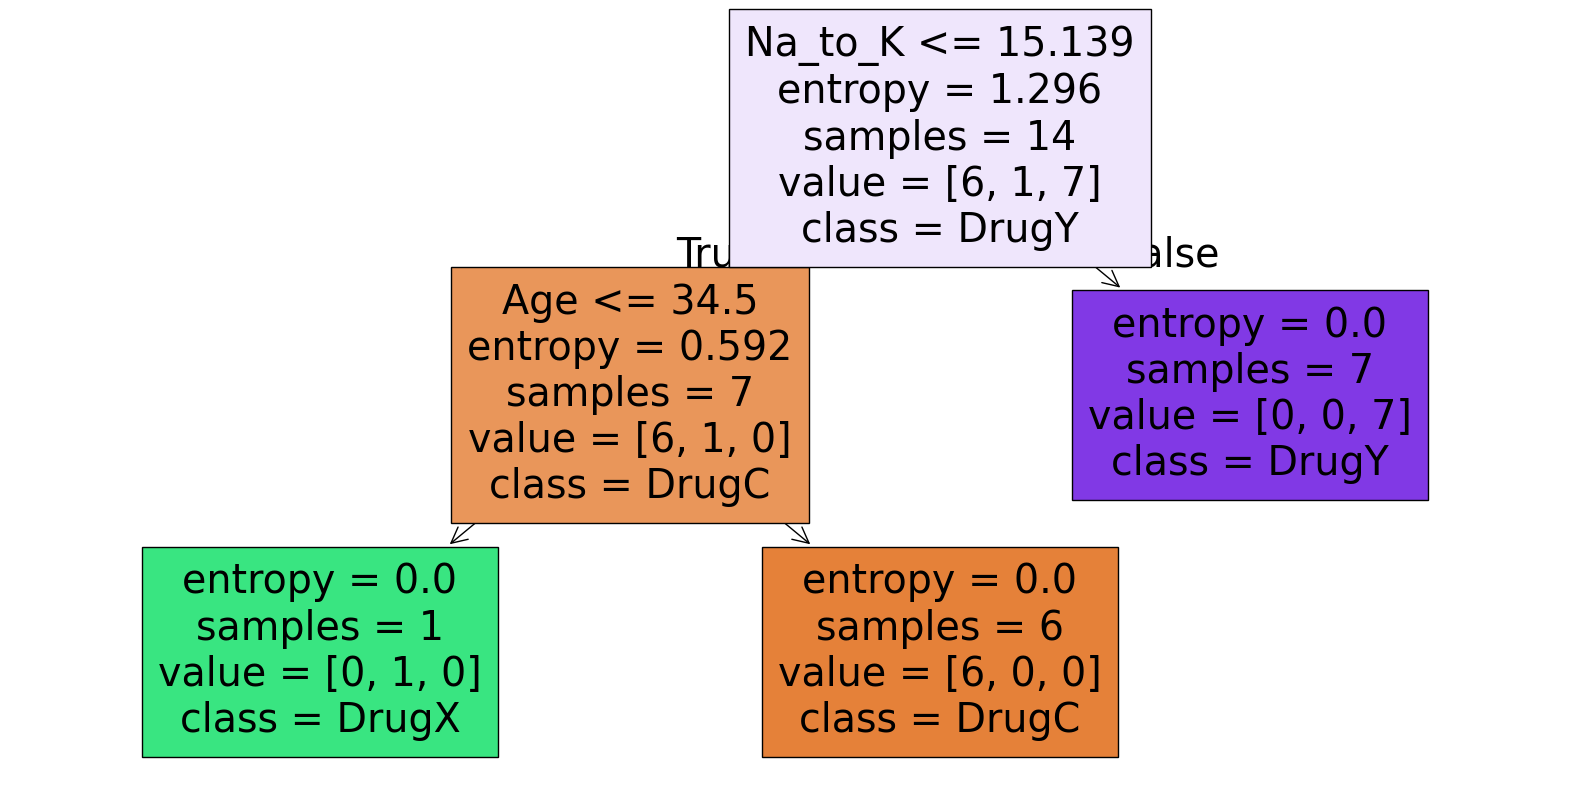

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Load dataset
df = pd.read_csv('drug.txt')

# 2. Encode categorical variables
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])  # M=1, F=0

le_bp = LabelEncoder()
df['BP'] = le_bp.fit_transform(df['BP'])  # HIGH=0, LOW=1, NORMAL=2

le_chol = LabelEncoder()
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])  # HIGH=0, NORMAL=1

le_drug = LabelEncoder()
df['Drug'] = le_drug.fit_transform(df['Drug'])  # DrugC=0, DrugX=1, DrugY=2

# 3. Features and labels
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# 4. Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Create and train the decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# 6. Predictions
y_pred = dt.predict(X_test)

# 7. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# 8. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_drug.classes_))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=le_drug.classes_,
            yticklabels=le_drug.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 10. Visualize the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               feature_names=['Age','Sex','BP','Cholesterol','Na_to_K'],
               class_names=le_drug.classes_,
               filled=True)
plt.show()